# Brandan Keen
# MET 3601 Final Exam Fall 2024

This exam can be completed by adding code to this notebook for each question. There are 4 questions worth 50 points each for a total of 100 pts.

## **<span style="color:red">Answer 2 Questions Only!</span>**

## **<span style="color:green">Graduate students must complete problem #3</span>**

A reminder that you are on the honor code. This includes both **plagiarism** and **cheating on exams**! You are not to discuss or share any part of this exam with your classmates, friends, etc. You may use an AI engine, however <span style = "color:red">you will lose points</span> if you do not cite your sources - <u>you must include screen dumps</u>. For more details see:  https://www.fit.edu/policies/academic/policies/academic-honesty/ 


Turn in a completed notebook, renamed as

`MET3601_Final_lastname.ipynb`

in <u>both</u> JupyterHub and Canvas. 

**DUE DATE: 13 December 2024 at 5:00 p.m.**
This is consistent with the Monday/Wednesday 11 am scheduled class times.

Be sure to cleanup and comment your code for each problem and that your output is self-describing. Also - run all cells to ensure that the code executes! You can create additional boxes in order to test portions of the code. However, please comment these out before submitting the exam.

**No late exams will be accepted!**

In [1]:
from datetime import datetime, timedelta

from metpy.plots import declarative
from metpy.units import units
from siphon.catalog import TDSCatalog
import xarray as xr

import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

from metpy.plots.declarative import *
from scipy.ndimage import gaussian_filter
import pandas as pd

## Question #1: Jet Streaks
Jet streaks are an important component of severe weather outbreaks. The idealized (straight) jetstreak model is comprised of two favorable regions for convection, i.e. the right front (entrance) and left rear (exit) where there tends to be rising motion. 

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;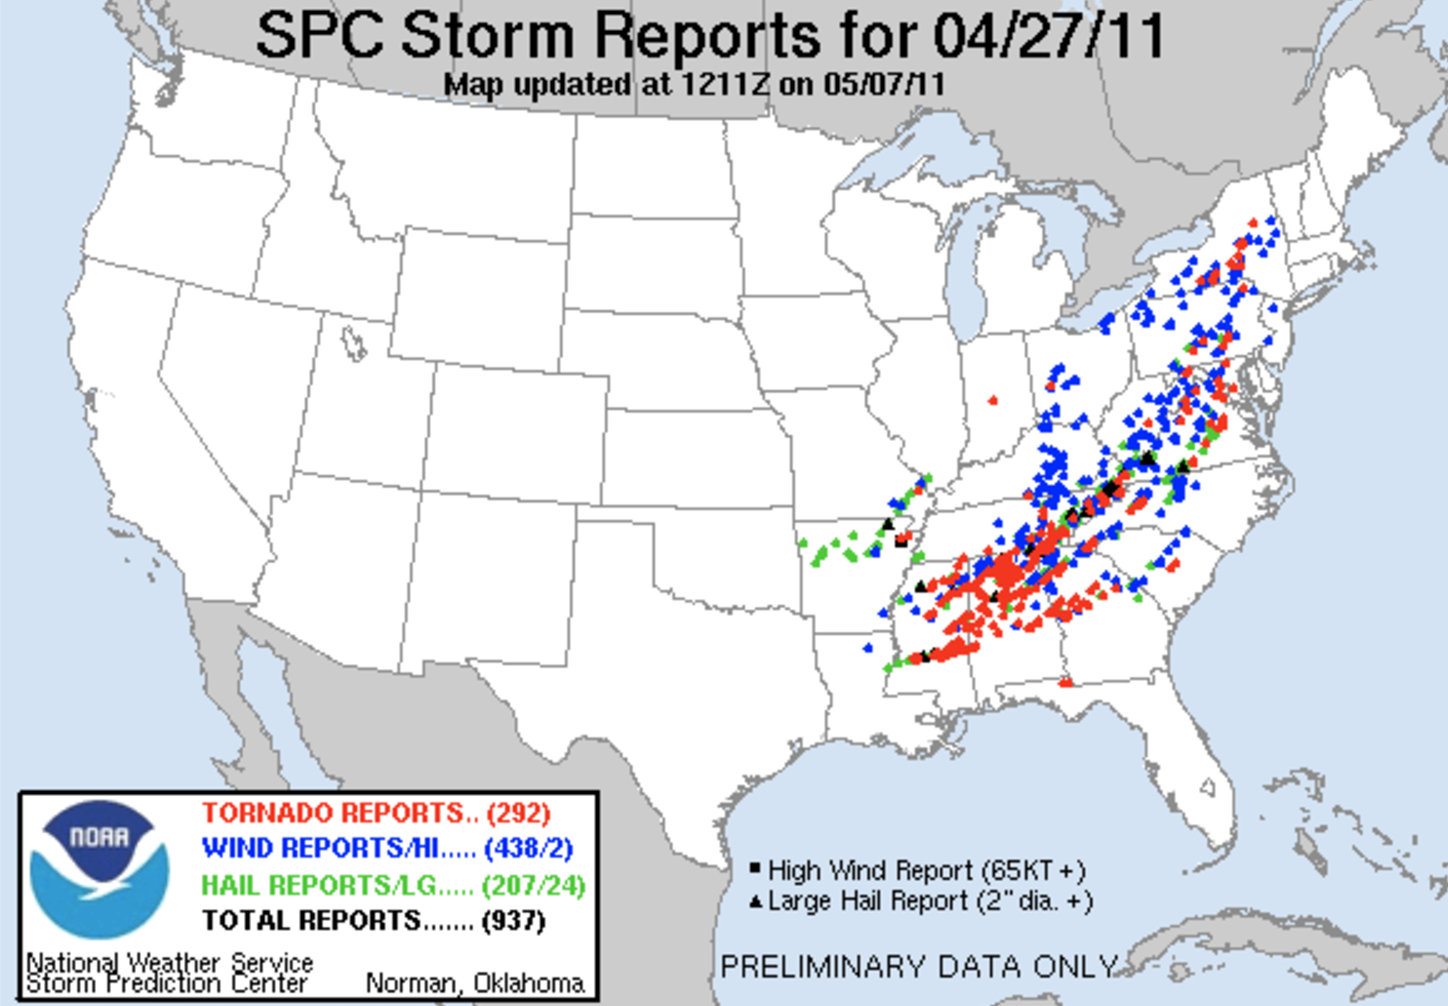

<br>
For this problem, you are going to generate a **<u>single</u>** figure that includes the following 3 items:  
<br>

* 300 hPa heights (meters)
* isotachs (contours of wind speed in kt)
* wind barbs

Please note that part (5 pts) of your grade will depend on aesthetics. Put some love into your figure ❤️!

In [2]:
# Set the date/time of the model run
### SET THE APPROPRIATE DATE/TIME ###
date = datetime(2011, 4, 27, 18)

### DRL Provided the url!
url = 'https://thredds.rda.ucar.edu/thredds/dodsC/aggregations/g/ds083.2/2/ds083.2_Grib2-2023'

### Open the data set:


#####################################

# The following dataset is available from December 6, 2007 at 06 UTC through December 31, 2023 
# at 18 UTC at https://thredds.rda.ucar.edu/thredds/dodsC/aggregations/g/ds083.2/2/

# a. Fill in the URL string
url = 'https://thredds.rda.ucar.edu/thredds/dodsC/aggregations/g/ds083.2/2/ds083.2_Grib2-2023'


# b. Open the data set
ds = xr.open_dataset(url)


syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: <!DOCTYPE^ html><html><head><title>Error</title><style>html { color-scheme: light dark; }body { width: 35em; margin: 0 auto;font-family: Tahoma, Verdana, Arial, sans-serif; }</style></head><body><h1>An error occurred.</h1><p>Sorry, the page you are looking for is currently unavailable.<br/>Please try again later.</p><p>If you are the system administrator of this resource then you should checkthe error log for details.</p><p><em>Faithfully yours, nginx.</em></p></body></html>


In [3]:
# c. Dump (print) the data frame
ds

<xarray.Dataset> Size: 3TB
Dimensions:                                                                   (
                                                                               lat: 181,
                                                                               lon: 360,
                                                                               time: 11923,
                                                                               time1: 2886,
                                                                               time2: 19417,
                                                                               ...
                                                                               depth_below_surface_layer_bounds_1: 2,
                                                                               height_above_ground_layer_bounds_1: 2,
                                                                               pressure_difference_layer1_bounds_1: 2,
                                                                               sigma_layer_bounds_1: 2,
                                                                               height_above_ground_layer1_bounds_1: 2,
                                                                               pressure_difference_layer2_bounds_1: 2)
Coordinates: (12/45)
  * lat                                                                       (lat) float32 724B ...
  * lon                                                                       (lon) float32 1kB ...
  * time                                                                      (time) datetime64[ns] 95kB ...
    reftime                                                                   (time) datetime64[ns] 95kB ...
  * time1                                                                     (time1) datetime64[ns] 23kB ...
    reftime1                                                                  (time1) datetime64[ns] 23kB ...
    ...                                                                        ...
  * height_above_ground_layer1                                                (height_above_ground_layer1) float32 4B ...
  * pressure_difference_layer2                                                (pressure_difference_layer2) float32 12B ...
  * height_above_ground4                                                      (height_above_ground4) float32 4B ...
  * height_above_ground5                                                      (height_above_ground5) float32 12B ...
  * altitude_above_msl                                                        (altitude_above_msl) float32 24B ...
  * altitude_above_msl1                                                       (altitude_above_msl1) float32 4B ...
Dimensions without coordinates: pressure_difference_layer_bounds_1,
                                depth_below_surface_layer_bounds_1,
                                height_above_ground_layer_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                sigma_layer_bounds_1,
                                height_above_ground_layer1_bounds_1,
                                pressure_difference_layer2_bounds_1
Data variables: (12/141)
    LatLon_Projection                                                         int32 4B ...
    pressure_difference_layer_bounds                                          (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 8B ...
    depth_below_surface_layer_bounds                                          (depth_below_surface_layer, depth_below_surface_layer_bounds_1) float32 32B ...
    height_above_ground_layer_bounds                                          (height_above_ground_layer, height_above_ground_layer_bounds_1) float32 8B ...
    pressure_difference_layer1_bounds                                         (pressure_difference_layer1, pressure_difference_layer1_bounds_1) float32 8B 

In [4]:
# d. Subset(slice) the dataset in time and space. The map should cover the U.S. only. Use latitudes 
#    ranging from 10°-to-70° N and longitudes ranging from (150°-to-55° W. Be careful with your 
#    lat/lon bounds when slicing! Also note that your longitude ranges from 0°-to-360°. Select the 
#    typical jet level of 300 hPa (30,000 Pa). You will need to extract the following 3 variables:

# Defining lat/lon sices
lat = slice(70, 10)
lon = slice(360-150,360-55)

# Subsetting the data set lat/lon
ds_subset = ds.sel(lat=lat,lon=lon)

 # Pulling time and level indices
time_index = np.where(ds_subset['time8'].values == np.datetime64('2011-04-27T18:00:00'))[0]
level_index = np.where(ds_subset['isobaric1'].values == 30000)[0]

# Subsetting the data set with time/level indices
ds_subset = ds_subset.isel(time8=time_index,isobaric1=level_index)

# Defining variables needed to plot
#u-component_of_wind_isobaric
u_wind = ds_subset['u-component_of_wind_isobaric'] * units('m/s').to('knots')
#v-component_of_wind_isobaric
v_wind = ds_subset['v-component_of_wind_isobaric'] * units('m/s').to('knots')
#Geopotential_height_isobaric
hght_300 = ds_subset['Geopotential_height_isobaric'] * units('m')

#print(u_wind,v_wind,hght_300)

# Removing time and level as dimensions
# Source: DeCaria Section 7.13, Page 92-93)
hght_300 = hght_300.squeeze()
v_wind   = v_wind.squeeze()
u_wind   = u_wind.squeeze()

#print(hght_300.dims,u_wind.dims,v_wind.dims)

In [5]:
# e.  Calculate wind speed in kt (see https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.wind_speed.html) 
wind_speed = mpcalc.wind_speed(u_wind, v_wind)
#print(wind_speed)
#wind_speed.max()

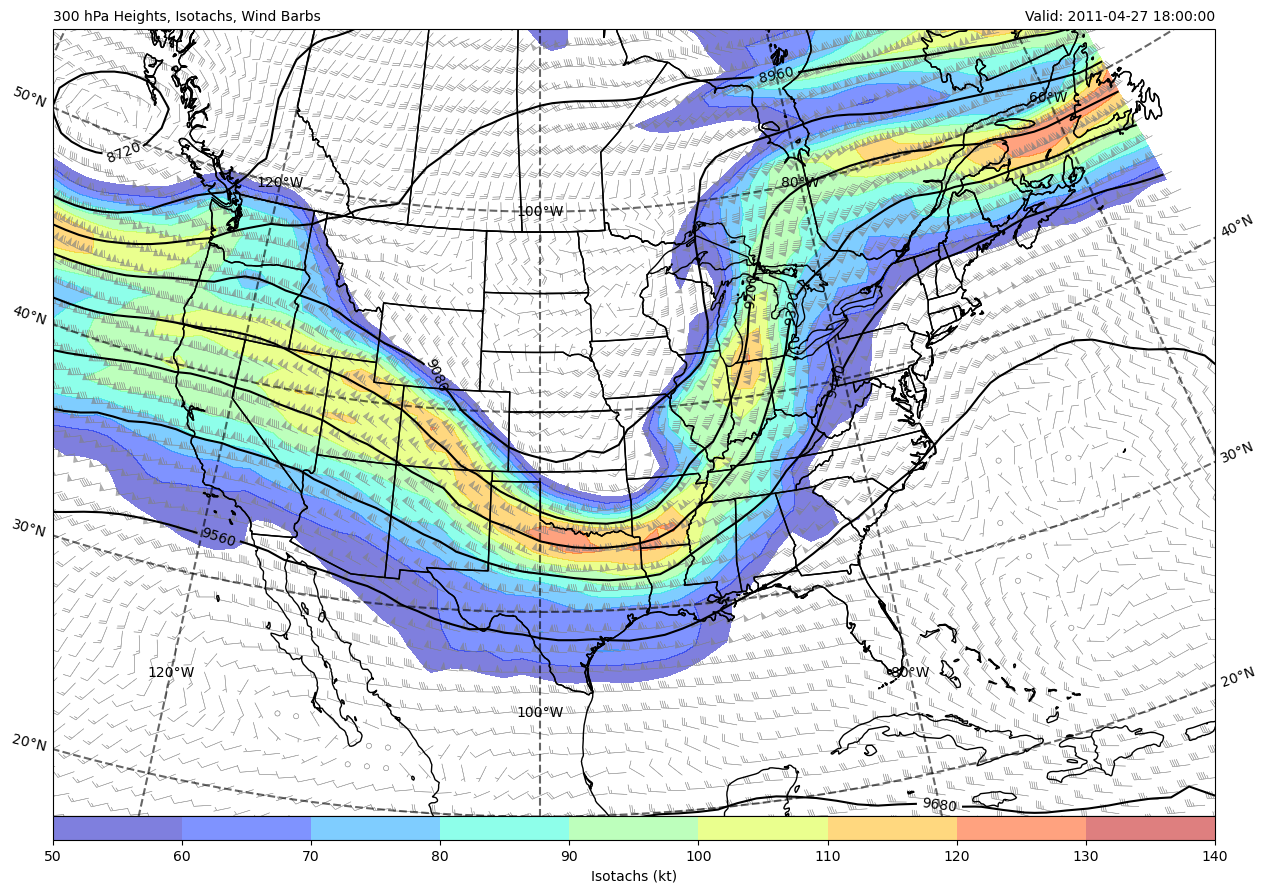

In [6]:
# f. Plotting.  Set figure size, projection and sublot

fig = plt.figure(figsize=(15, 20))
proj = ccrs.LambertConformal(central_latitude=40, central_longitude=-100)
ax = plt.axes(projection=proj)

# Set plot area
ax.set_extent([-125, -65, 20, 55], crs=ccrs.PlateCarree())

# Add 300 hPa height contours and labels   

hght_contours = ax.contour(ds_subset['lon'], ds_subset['lat'],hght_300,levels=range(8000, 12000, 120), 
            colors='black', transform=ccrs.PlateCarree())
ax.clabel(hght_contours,inline=True, fontsize=10, fmt='%d')

# Add colorfill of the isotachs ranging from 50 kt to 150 kt in intervals of 10 kt. Include a colorbar!
cfill = ax.contourf(
    ds_subset['lon'], ds_subset['lat'], wind_speed,levels=range(50, 150, 10),
            cmap='jet',alpha=.5,transform=ccrs.PlateCarree())

# Adding Colorbar
cbar = plt.colorbar(cfill, orientation='horizontal',pad=0, aspect=50)
cbar.set_label('Isotachs (kt)')

# Add wind barbs in knots
ax.barbs(ds_subset['lon'][::1], ds_subset['lat'][::1], u_wind[::1,::1].values, v_wind[::1,::1].values, 
            pivot='middle', color='gray', alpha=0.6, transform=ccrs.PlateCarree(),
            length=5, linewidth=0.4)

# Add Geographic Features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

# Adding gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1.5, color='black', alpha=0.6, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 10, 'color':'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Add plot titles
ax.set_title('300 hPa Heights, Isotachs, Wind Barbs', fontsize=10, loc='left')
ax.set_title(f'Valid: {date}', fontsize=10, loc='right')

plt.tight_layout
plt.savefig('Question1_Keen')
plt.show()

## This is my figure
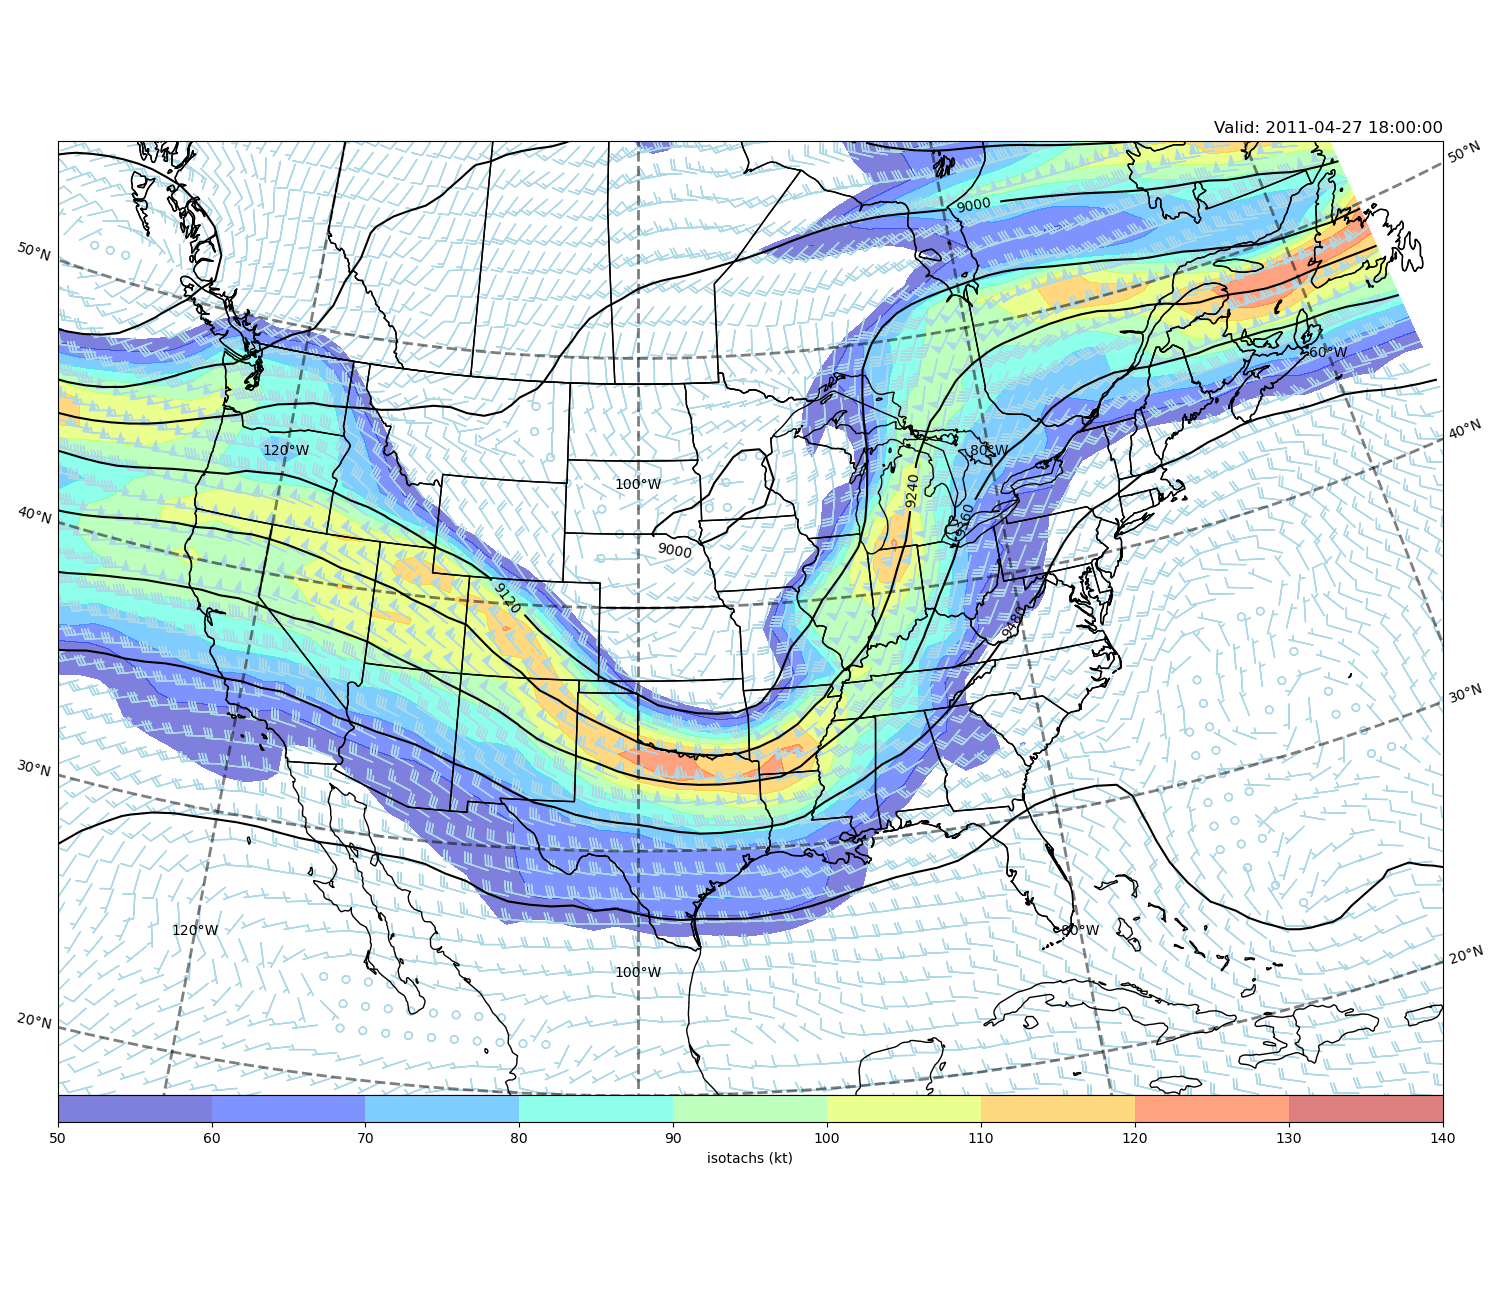

## Question #2: In Thickness and in Health
  The depth of a layer between two isobaric surfaces is defined by the hypsometric equation, i.e.

\begin{equation}
\Delta z ={\frac{R_d * \overline T_v}{g}\left[ln\frac{p_0}{p_1}\right]},
\end{equation}


where $p_{0}$ is the reference pressure (typically 1000 hPa), $\overline{T_v}$ is the layer mean virtual temperature in Kelvin, $R_{d}$ is the dry gas constant (287 J $K^{-1}$ $kg^{-1}$) and `g` is gravity (9.81 $ms^{-2}$). 

The layer thickness is a useful forecast tool. It is typically taken over the 1000 hPa to 850 hPa or 1000 hPa to 500 hPa. Here were are going to apply it to the former. In addition, we are not going to use that formula directly, but rather take the difference between the 850 and 1000 hPa heights (graphical analysis and we are going to let the computer do all of the work!). 

<br>
For this problem, you are going to generate a <u>single</u> figure that includes the following 3 items:  
<br>

* 1000 hPa heights (meters)
* 850 hPa  heights (meters)
* Layer thickness (i.e., 850 hPa heights - 1000 hPa heights)


In [7]:
# Set the date/time of the model run
date = datetime(2024, 11, 30, 12)

# Remote access to the dataset from the UCAR THREDDS server
ds = xr.open_dataset('https://thredds.ucar.edu/thredds/dodsC/grib'
                     f'/NCEP/GFS/Global_0p5deg_ana/GFS_Global_0p5deg_ana_{date:%Y%m%d_%H%M}.grib2')
#ds

In [8]:
###DRL Some basics (aka sanity check!) 

# a. Use a f string to print:
# i. The 4 digit year and 2 digit year
print(f'{date:%Y}')
print(f'{date:%y}')

# ii. The name of the month (not the numeric value!)
print(f'{date:%B}')


2024
24
November


In [9]:
# b. Extract the hour from the datetime string without a print statment
hour = date.hour

In [33]:
# Subset data to be just over the U.S. for plotting purposes

# Defining lat/lon sices
lat = slice(70, 10)
lon = slice(360-125,360-60)

# Subsetting the data set lat/lon
ds_subset = ds.sel(lat=lat,lon=lon)

#print(ds_subset)

In [11]:
# c. Subset the time and isobaric level for the geopotential heights

# i. 1000 hPa (100000 Pa)
index_1000hPa = np.where(ds_subset['isobaric'].values == 100000)[0]
isobaric_1000 = ds_subset.isel(isobaric=index_1000hPa)
heights_1000 = isobaric_1000['Geopotential_height_isobaric']

# ii. 850 hPa (85000 Pa)
index_850hPa = np.where(ds_subset['isobaric'].values == 85000)[0]
isobaric_850 = ds_subset.isel(isobaric=index_850hPa)
heights_850 = isobaric_850['Geopotential_height_isobaric']

#print(heights_1000.dims)
#print(heights_1000.shape)
#print(heights_850.shape)

# Removing time and isobaric as dimensions
# Source: DeCaria Section 7.13, Page 92-93)
heights_1000 = heights_1000.squeeze()
heights_850 = heights_850.squeeze()

#print(heights_1000.dims)
#print(heights_1000.shape)
#print(heights_850.shape)
#print(heights_1000.max(),heights_850.max())

In [12]:
# d. Calculate the 850-1000 hPa thickness

thickness_1000_850 = (heights_850 - heights_1000)

#thickness_1000_850

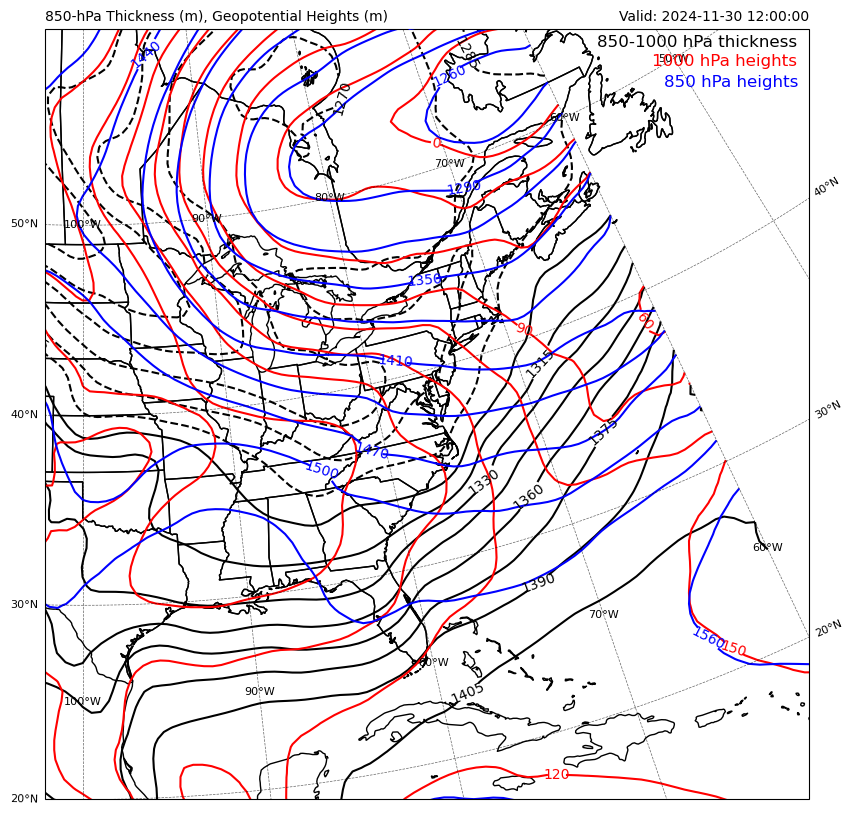

In [13]:
# f. Plotting.  Set figure size, projection and sublot
fig = plt.figure(figsize=(20, 10))
proj = ccrs.LambertConformal( central_longitude=-100)
ax = plt.axes(projection=proj)

#Set plot area (Use this region!)
ax.set_extent([-102, -60, 20, 55], ccrs.PlateCarree())



# Smooth the 850-to-1000 hPa thickness (run 3 passes of a 9 pt filter - see lecture 21a)

smoothed_thickness = mpcalc.smooth_n_point(thickness_1000_850, n=9, passes=3)

# Add the thickness contours. Use a 15 m contour interval
# Note: The thickness values should be on the order of 1300 m! If the thickness is 
# greater than 1300 m use a solid black contour, if it is less use a dashed contour.
thickness_contours = ax.contour(ds_subset['lon'], ds_subset['lat'], smoothed_thickness,levels=range(1000, 2000, 15),
                                colors='black',transform=ccrs.PlateCarree(),
                                linestyles=['--' if lev < 1300 else '-' for lev in range(1000, 2000, 15)])
                    
ax.clabel(thickness_contours, inline=True, fontsize=10, fmt='%d')

#Smooth 1000 hPa heights (run 3 passes of a 9 pt filter - see lecture 21a) 
smoothed_heights_1000 = mpcalc.smooth_n_point(heights_1000, n=9, passes=3)



# Add the 1000 hPa height contours in red (solid line). Use a 30 m contour interval.
height_1000_contours = ax.contour(ds_subset['lon'], ds_subset['lat'], smoothed_heights_1000,
                                  levels=range(0, 500, 30),colors='red',
                                  transform=ccrs.PlateCarree(),linestyles='-')
ax.clabel(height_1000_contours, inline=True, fontsize=10, fmt='%d')


#Smooth 850 hPa heights (run 3 passes of a 9 pt filter - see lecture 21a) 
smoothed_heights_850 = mpcalc.smooth_n_point(heights_850, n=9, passes=3)


# Add the 850 hPa height contours in blue (solid line). Use a 30 m contour interval.

height_850_contours = ax.contour(ds_subset['lon'], ds_subset['lat'], smoothed_heights_850,
                                  levels=range(0, 2000, 30),colors='blue',
                                  transform=ccrs.PlateCarree(),linestyles='-')
ax.clabel(height_850_contours, inline=True, fontsize=10,fmt='%d')


# DRL Add Labels
ax.text(-55, 52.5, '850-1000 hPa thickness', color='black', fontsize=12, transform=ccrs.PlateCarree())
ax.text(-51.8, 50.25, '1000 hPa heights', color='red', fontsize=12, transform=ccrs.PlateCarree())
ax.text(-51.8, 49, '850 hPa heights', color='blue', fontsize=12, transform=ccrs.PlateCarree())
# Adding gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=.5, color='black', alpha=0.6, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 8, 'color':'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}


#DRL Add Features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))


#Add Title
ax.set_title(f'850-hPa Thickness (m), Geopotential Heights (m)', fontsize=10, loc='left')
ax.set_title(f'Valid: {date}', fontsize=10, loc='right')


plt.tight_layout
plt.savefig('Question2_Keen')
plt.show()

## This is my figure
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;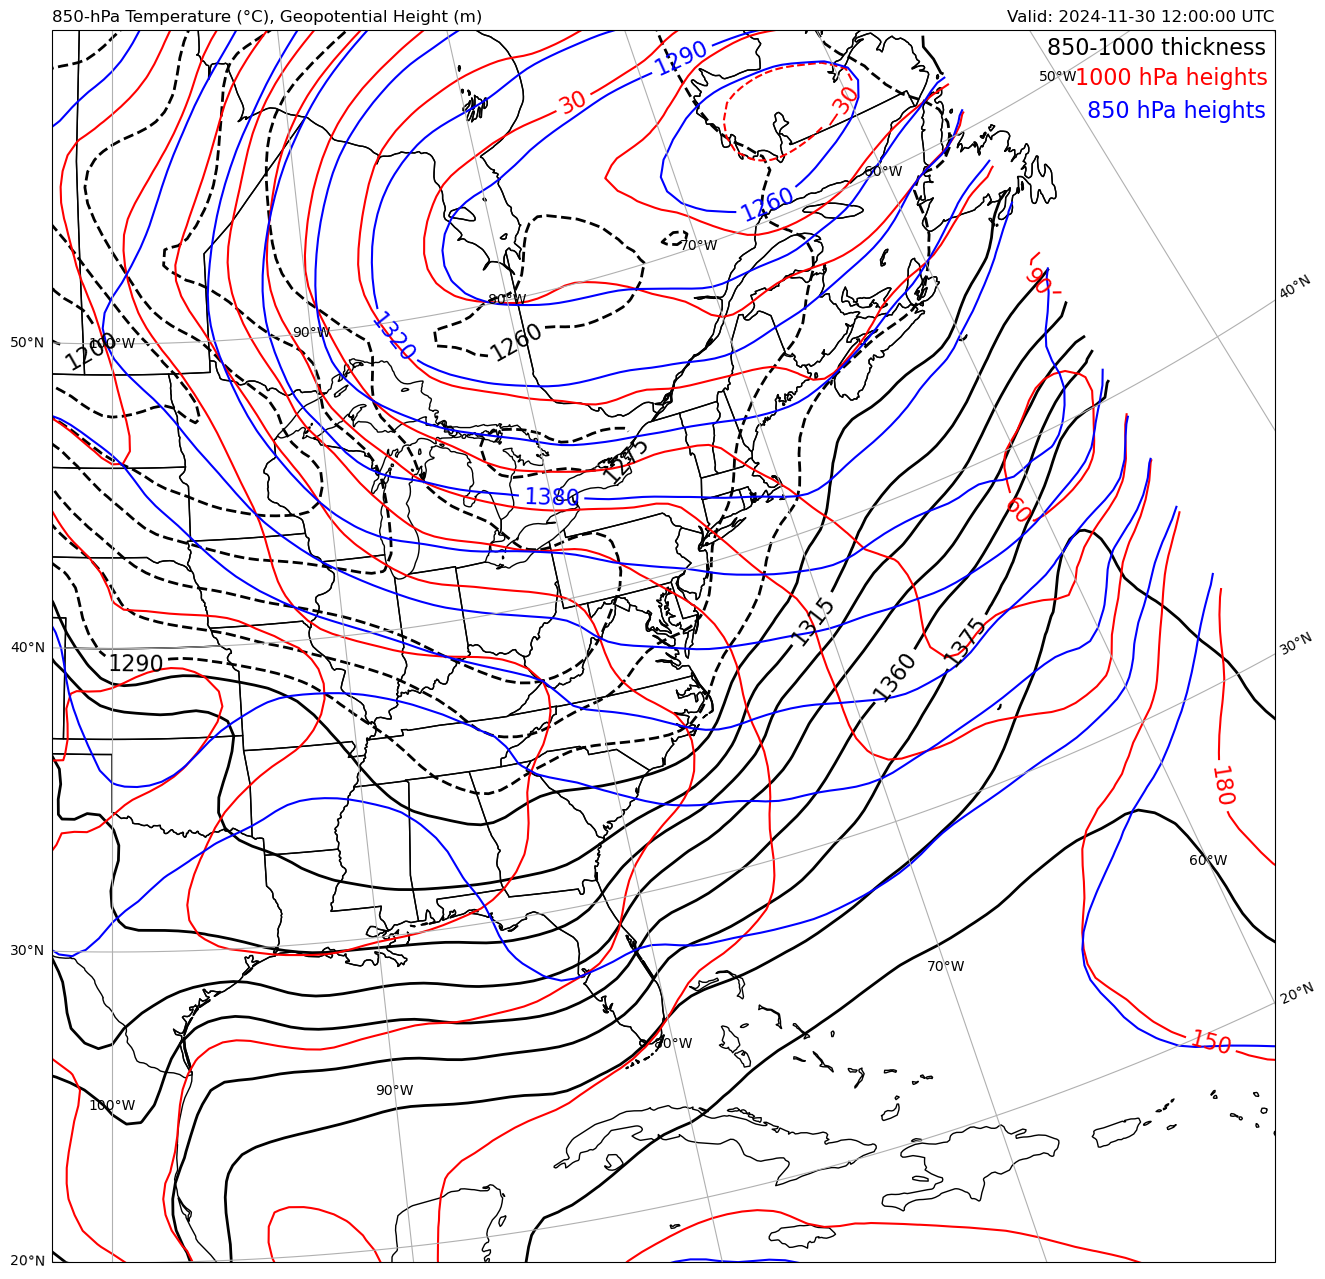

## Question #3: Pandas are so Cute! 
Graduate students must answer this question!

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;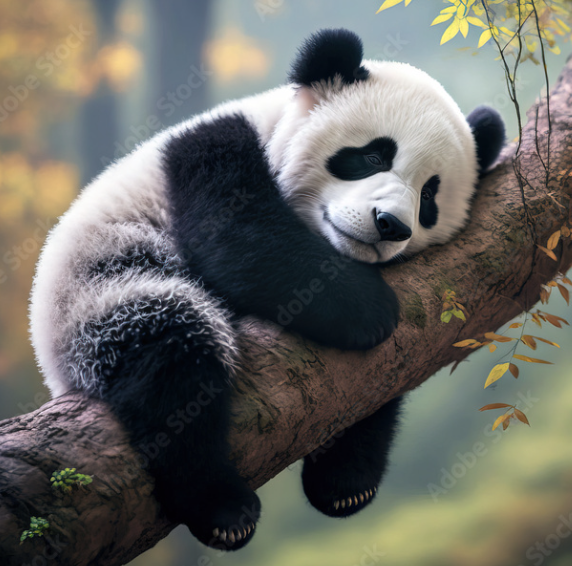


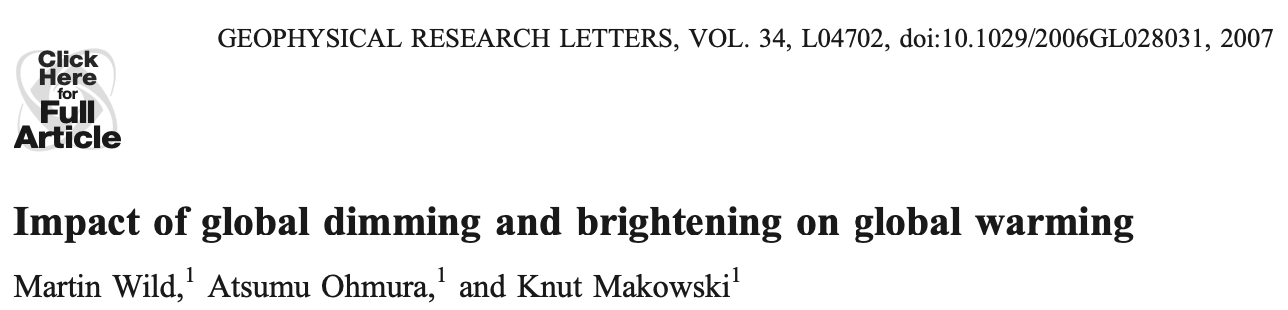

&emsp;&emsp;&emsp;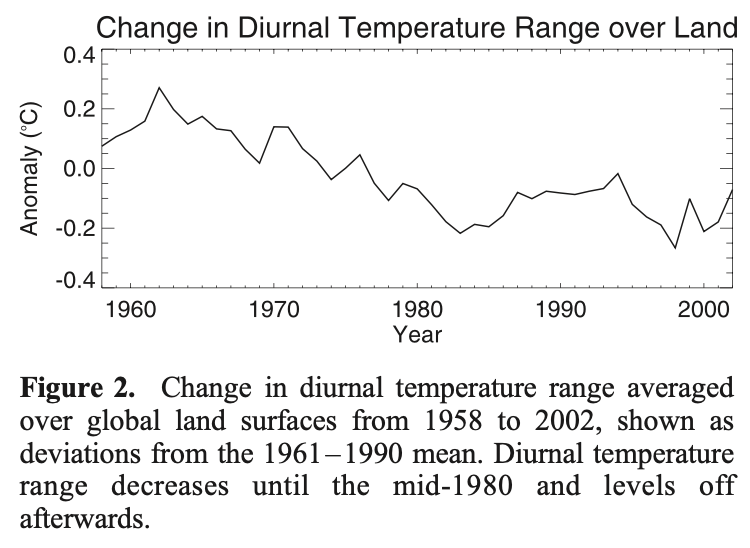

Green house gasses have impacted on our climate in different, sometimes subtle ways. One of the signatures in the past several decades is the reduction in the diurnal temperature range (maximum - minimum) due to the longwave radiative forcing increasing the minimum temperatures at a rate that is greater than the daytime increase. Here, you will investiage this for a single surface station (Tampa).

For this problem you will work with 3 .csv files that were obtained from the Florida Climate webiste at:
https://climatecenter.fsu.edu/climate-data-access-tools/downloadable-data.

<br> 
The climate data (from Tampa International Airport) are already in the exam folder and consist of daily minimum, maxium, and average temperatures:
<br>

* TBW_1900_2023_MinT.csv
* TBW_1900_2023_MaxT.csv
* TBW_1900_2023_AvgT.csv


In [14]:
# a. Use Pandas to read in the 3 files. You will need to replace the 
#    missing values with NaN's (see 16_Pandas lecture for how to do 
#    this while reading in the files).




In [15]:
# b. Use the appropriate syntax to check the number of lines in each 
#    of the files (without using a print statement). 




In [16]:
# c. Extract the maximum and minimum temperature columns from their
#    respective data frames and add them to the average temperature 
#    data frame.





In [17]:
# d. Calculate the diurnal temperature range (maxT - minT) and add
#    the column to the same data frame as the box above.




In [18]:
# e. Set the data frame index to the 'YEAR'



In [19]:
# f. Write the new (appended) Pandas dataframe to a .csv  (keep the NaNs!)




In [20]:
# g. Group the data by year and month (see 16_pandas lecture). Save the
#    output in a new data frame.




In [21]:
# h. Calculate the mean (minT, maxT, avgT, and diurnalT) for each month 
#    and all years. Save the output in a new data frame. 




In [22]:
# i. What is the 'shape' of this new dataframe in h). Do not use a print
#    statement or dataframe dump. Note that there are 12 months per year
#    and 124 years.



In [23]:
# j. Extract the diurnal temperature range (column) from the dataframe 
#    in h).



In [24]:
# k. Extract (slice) the diurnal temperature range for the month of 
#    January only. Store these in a variable called diurnal. Check 
#    the shape of this .array. Note that there are 124 years!




In [25]:
# n. Slice your Janurary diurnal temperature range to calculate a 
#    30-yr mean (1961-1990) for the month. Subtract the mean from
#    the Janauary time series.



In [26]:
# l. Plot the January anomaly data. Place the monthly mean diurnal 
#    temperature anomaly on the y axis and year on the x. Limit the 
#    x axis by starting it in 1930 (i.e.,do not extend it back to 
#    1900 since the early data are missing!). Title the figure 'January'




In [27]:
# m. Create a list of named months, [jan, feb...] 



In [28]:
# o. Use the list of months to create a multi-panel plot (4 rows x 3
#    columns = 12 panels) of the diurnal temperature anomolies. The 
#    first row should be Jan, Feb, Mar and second row Apr, May, Jun, etc.




## This is my figure
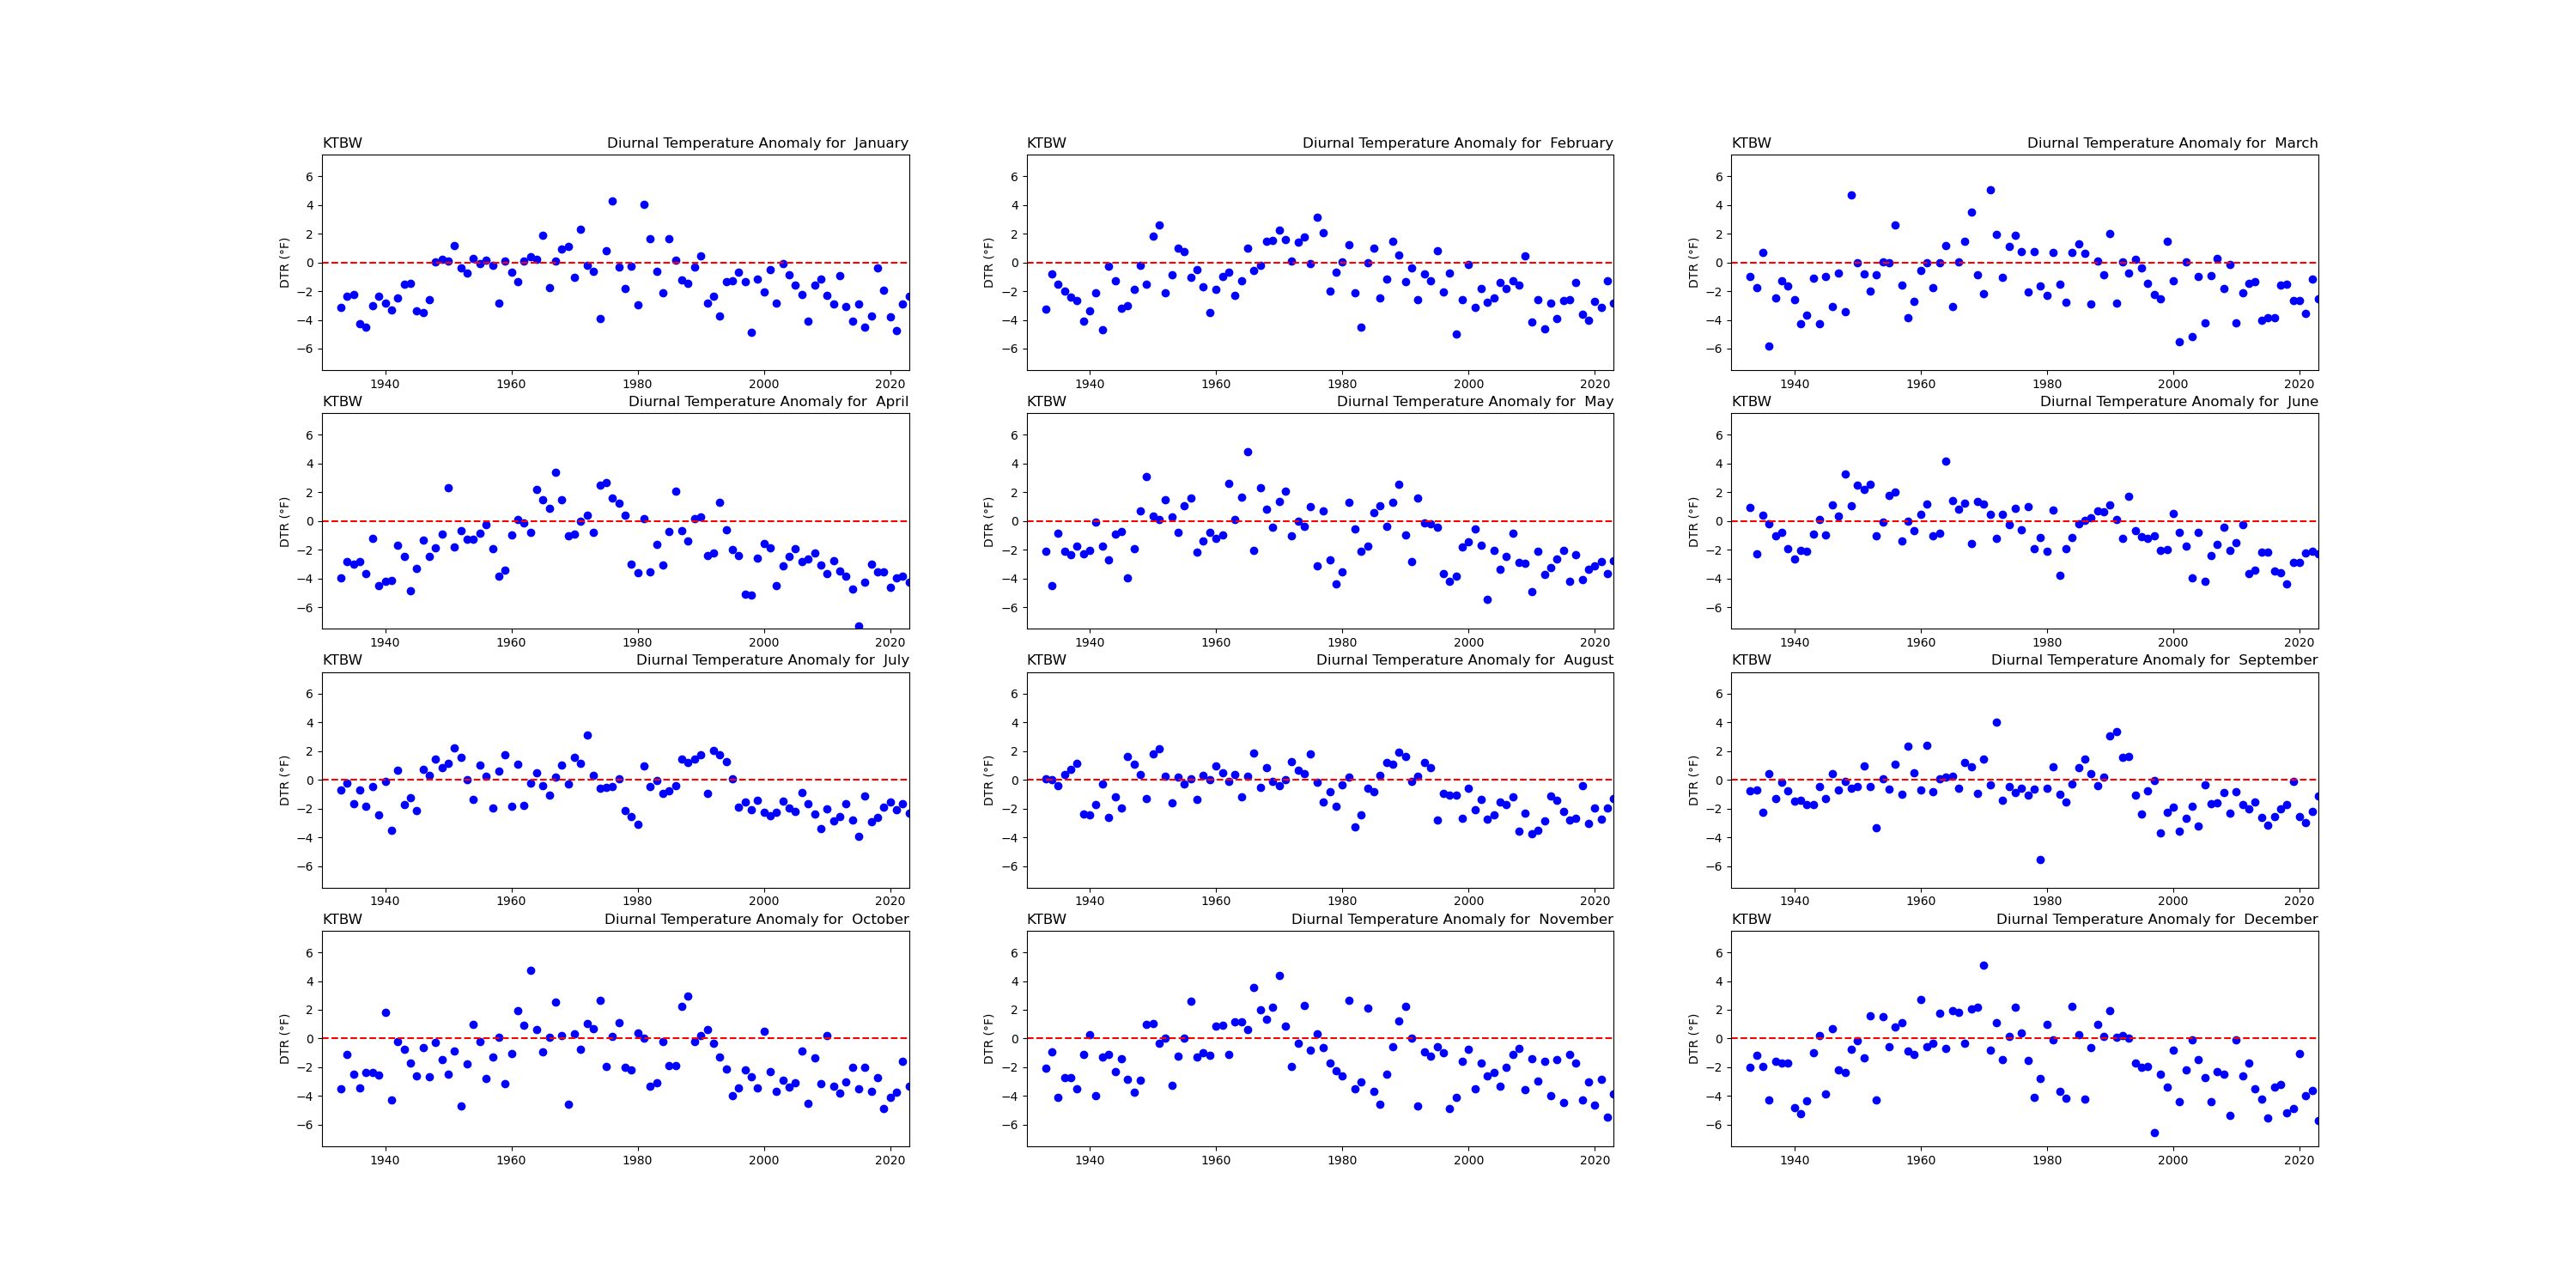

## Question #4: Time to Disperse!

Dispersion is critical when it comes to predicting the concentration and downwind location of pollutants. 


For this problem you will create two functions related to the dispersion of an idealized Gaussian plume and then use them. The first of these relates the buoyant flux ${F_b}$ ($m^{4}s^{-3}$) coming from a 100 m tall smoke stack to the following: exit speed of the flow coming out of the stack ${w_0}$ (= 20 $ms^{-1}$), the stack radius ${R_0}$ (= 5 m) and stack exit temperature ${T_{p0}}$ (= 353 K), the ambient (air) temperature ${T_{a0}}$ (= 283 K), and gravity (= 9.81 $ms^{-2}$), i.e.

**Equation 1:** Bouyant Flux
\begin{equation}
F_b ={w_0R_0^{2}\frac{g}{T_{p0}}(T_{p0} - T_{a0})},
\end{equation}

The second function relates the height of the plume rise above the stack ($\Delta h$) to the buoyant flux and wind speed at the stack height ${u_h}$  (= 11.3 $ms^{-1}$), i.e.

**Equation 2:** Plume Rise
(for more information, see Section 6.3.5 in the Colls_Dispersion.pdf on the Jupyterhub)

\begin{equation}
\Delta h =39{\frac{F_b^{0.6}}{u_{h}}},  
\end{equation}

for $F_b$ $\ge$ 55. See figure below for $\Delta h$.

&emsp;&emsp;&emsp;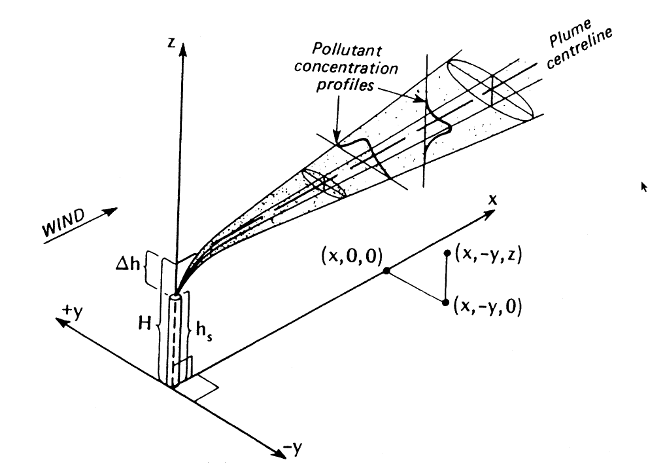

<br> <br>
There should be two figures for this question!

In [29]:
# a. Set up a function for Equation 1 that returns the buoyant flux. There should be
#    4 arguments (gravity is a constant and thus should be defined in the function
#    itself.




In [30]:
# b. Set up a function for Equation 2 that returns the plume rise above the stack. 
#    There should be 2 arguments





In [31]:
# c. Plot the plume rise (y axis, m) above stack height as function of the buoyant flux 
#    (x axis, see units above). Vary the buoyant flux from 0 to 2000 in increments of 100. 
#    Set all other variables to their default values provided above. Include a title that
#    contains the stack height and default wind speed provided above.





In [32]:
# d. Plot the plume rise (y axis, m) above the stack as function of the wind speed at
#    stack height (x axis, m/s). Vary the wind speed from 2 to 20 in increments of 1 m/s. 
#    Include a title w/ units that contains the stack height and default bouyancy flux
#    - note it is held constant for this figure (you can calculate the value using the exit 
#    velocity, stack radius, stack temperature, and ambient temperature provided above). 





## These are my figures

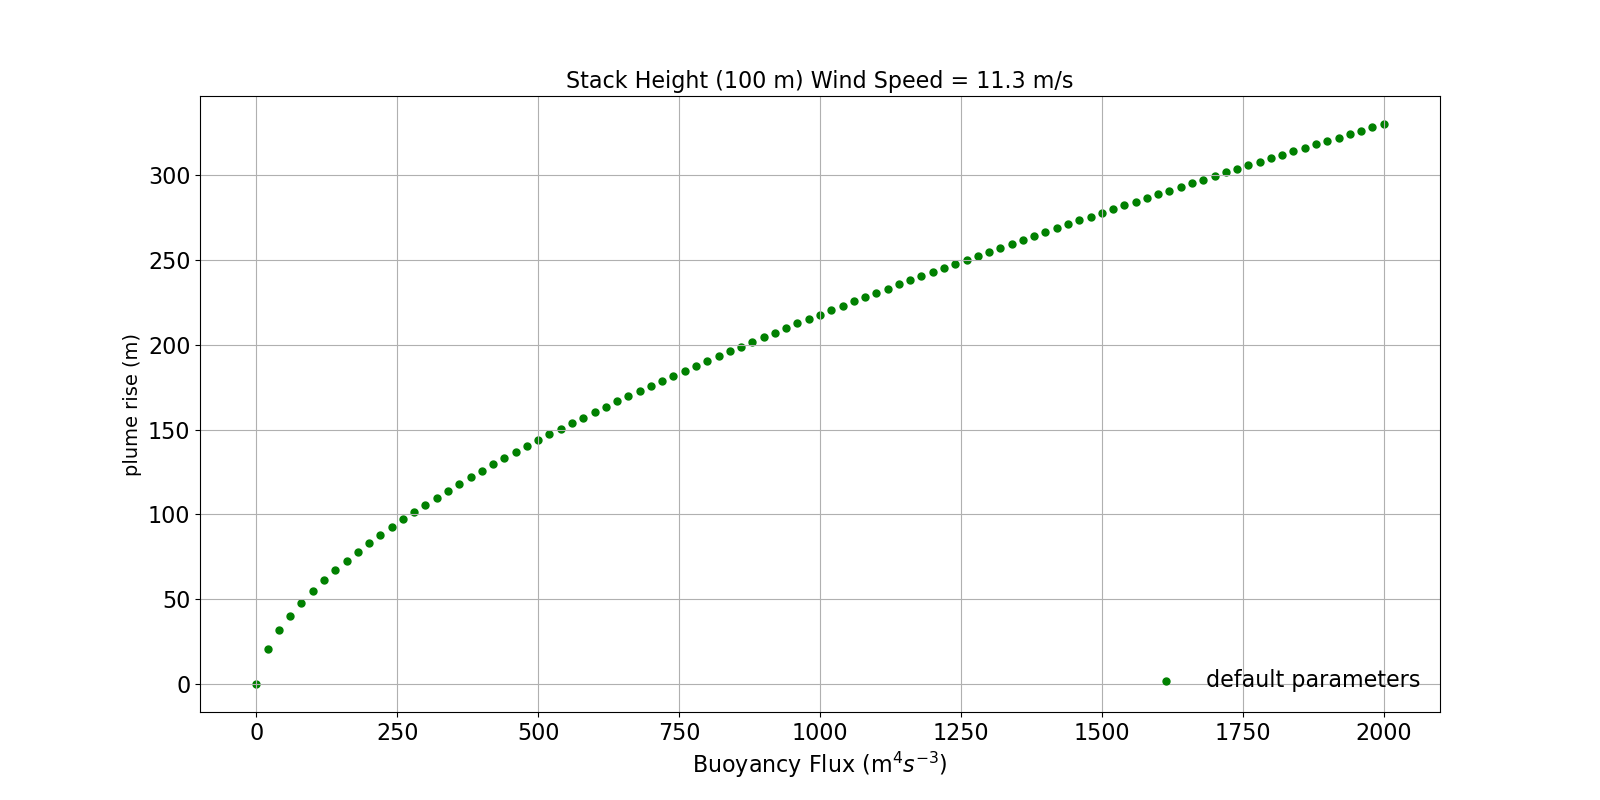
    
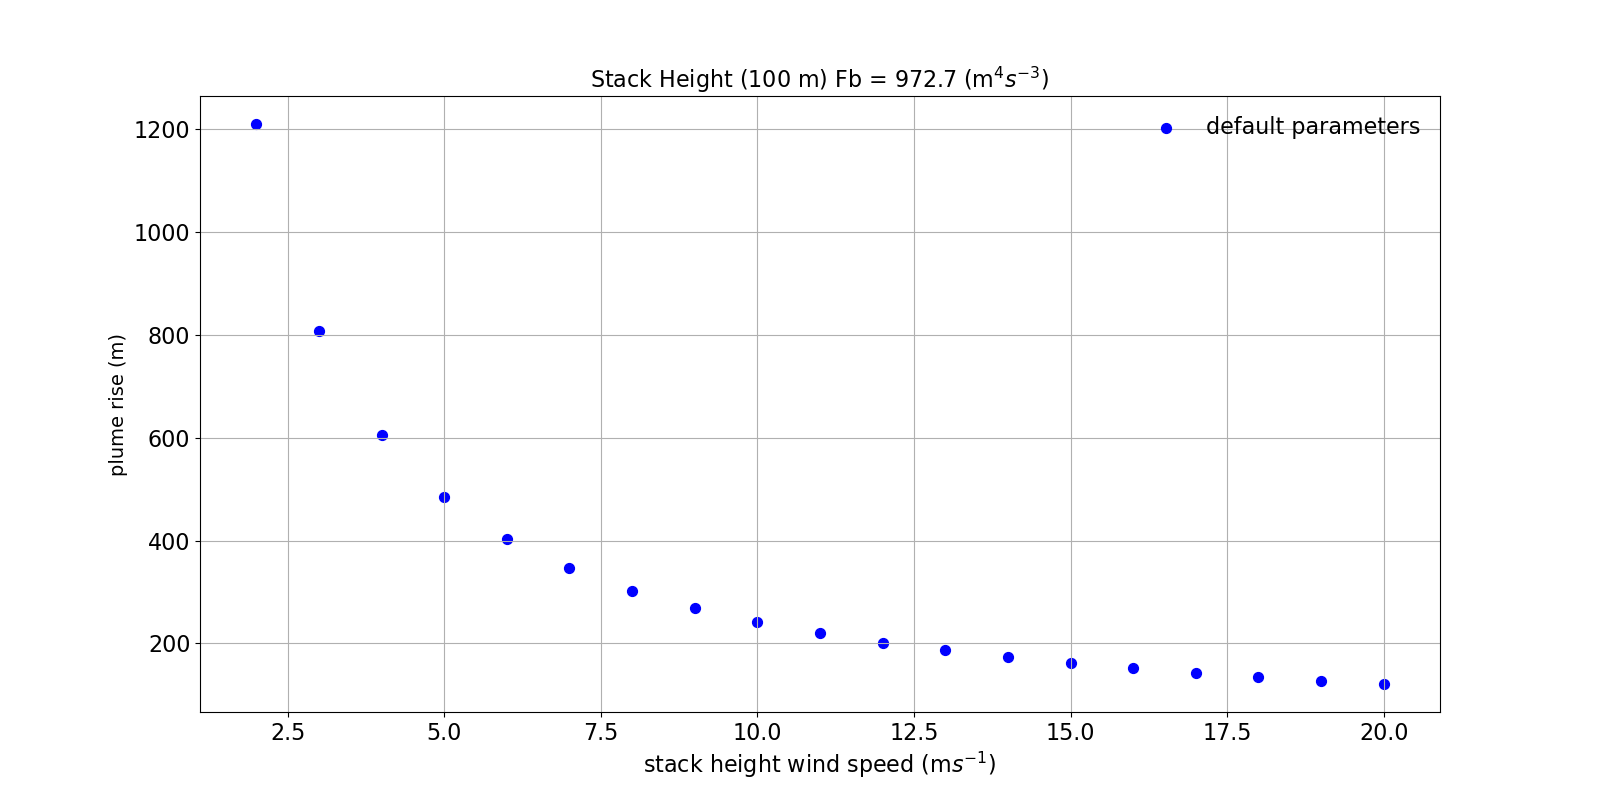
